# Load Network

In [1]:
# load train_network.gexf
import networkx as nx
G = nx.read_gexf("train_network_duplicate_removed.gexf")

# print the number of nodes and edges
print("Number of nodes: ", G.number_of_nodes())
print("Number of edges: ", G.number_of_edges())


Number of nodes:  222
Number of edges:  487


In [2]:
# convert the graph to an undirected simple graph
undirected_G = G.to_undirected()

In [3]:
undirected_G.number_of_nodes()
undirected_G.number_of_edges()

341

In [4]:
# generate degree distribution of undirected_G
import collections
degree_sequence = sorted([d for n, d in undirected_G.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())


# Degree Plot

In [5]:
# import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter

def plot_degree_distribution(G):
    """
    Generates and plots the degree distribution of an undirected graph.

    Parameters:
        G (networkx.Graph): The input graph.

    Returns:
        dict: A dictionary where keys are degrees and values are their frequencies.
    """
    # Get the degree of each node
    degrees = [degree for _, degree in G.degree()]

    # Count the frequency of each degree
    degree_counts = Counter(degrees)

    # Separate degrees and their frequencies for plotting
    x, y = zip(*sorted(degree_counts.items()))

    
    total_nodes = G.number_of_nodes()

    # Normalize the frequency of each degree
    y = [count / total_nodes for count in y]
    

    # Plot the degree distribution
    plt.figure(figsize=(8, 6))
    plt.bar(x, y, width=0.8, color='b', alpha=0.7, edgecolor='k')
    plt.title('Degree Distribution', fontsize=14)
    plt.xlabel('Degree', fontsize=12)
    plt.ylabel('Probability', fontsize=12)
    plt.xticks(range(0, max(x) + 1))
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    # plot log-log degree distribution
    plt.figure(figsize=(8, 6))
    plt.loglog(x, y, 'bo', alpha=0.7)
    plt.title('Log-Log Degree Distribution', fontsize=14)
    plt.xlabel('Degree', fontsize=12)
    plt.ylabel('Probability', fontsize=12)
    plt.grid(True, which="both", ls="--", alpha=0.7)
    plt.show()

    return dict(degree_counts)


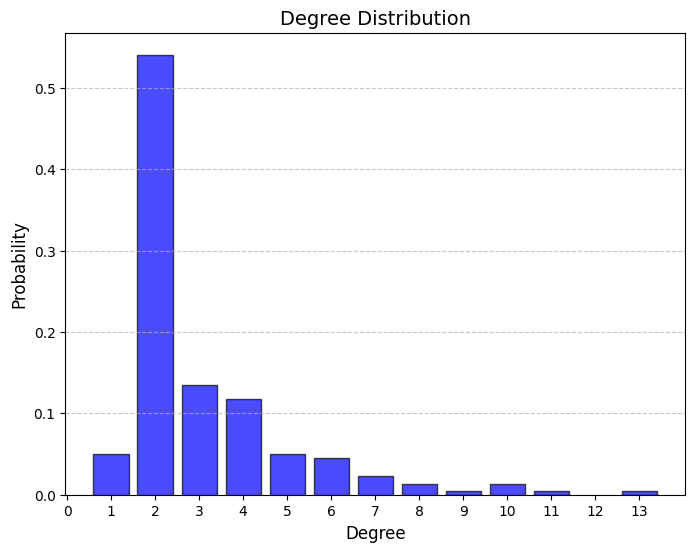

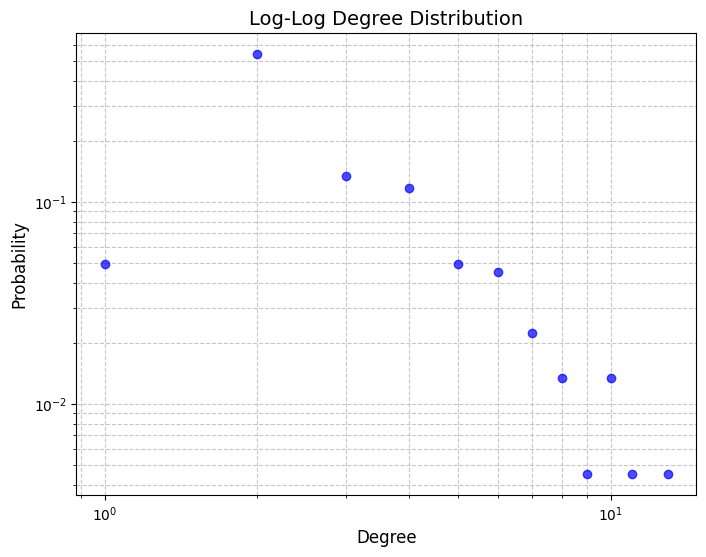

{9: 1,
 11: 1,
 10: 3,
 6: 10,
 13: 1,
 7: 5,
 2: 120,
 4: 26,
 3: 30,
 5: 11,
 8: 3,
 1: 11}

In [6]:
plot_degree_distribution(undirected_G)

# Failure and attacks

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
import random

def plot_giant_component_vs_node_removal(G, removal_strategy="random", title = "Random Failures"):
    """
    Plots the size of the giant component vs the fraction of nodes removed.

    Parameters:
        G (networkx.Graph): The input graph.
        removal_strategy (str): The strategy for node removal ('random' or 'degree').
    """
    # Make a copy of the graph
    G = G.copy()
    num_nodes = G.number_of_nodes()

    # List to store the fraction of nodes removed and size of the giant component
    fractions_removed = []
    giant_component_sizes = []

    # Generate a list of nodes to remove
    if removal_strategy == "degree":
        # Remove nodes by descending degree
        nodes = sorted(G.degree, key=lambda x: x[1], reverse=True)
        nodes = [node for node, _ in nodes]
    elif removal_strategy == "random":
        # Remove nodes in random order
        nodes = list(G.nodes)
        random.shuffle(nodes)
    else:
        raise ValueError("Invalid removal strategy. Choose 'random' or 'degree'.")

    # Remove nodes one by one and compute the size of the giant component
    for i, node in enumerate(nodes):
        G.remove_node(node)
        largest_cc = max(nx.connected_components(G), key=len, default=[])
        fractions_removed.append((i + 1) / num_nodes)  # Fraction of nodes removed
        giant_component_sizes.append(len(largest_cc) / num_nodes )  # Size of the giant component

    # Plot the results
    plt.figure(figsize=(8, 6))
    plt.plot(fractions_removed, giant_component_sizes, label=f"Strategy: {removal_strategy}")
    plt.title(title, fontsize=14)
    plt.xlabel("Fraction of Nodes Removed", fontsize=12)
    plt.ylabel("Size of Giant Component", fontsize=12)
    plt.grid(alpha=0.7)
    plt.legend(fontsize=10)
    plt.show()


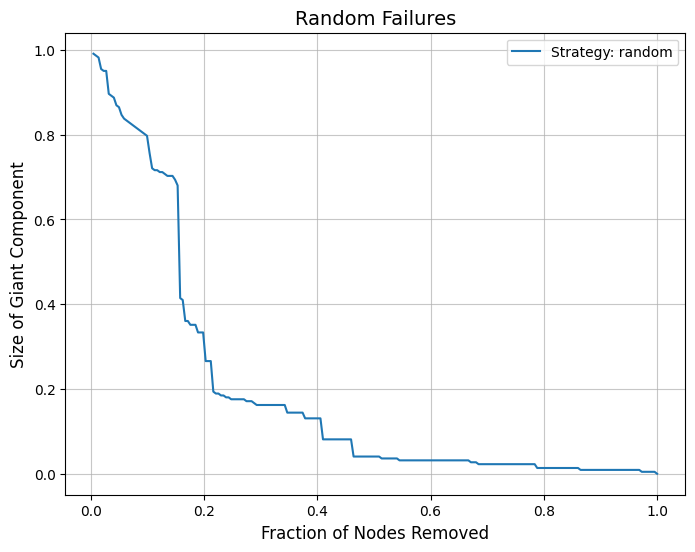

In [8]:
plot_giant_component_vs_node_removal(undirected_G, "random")

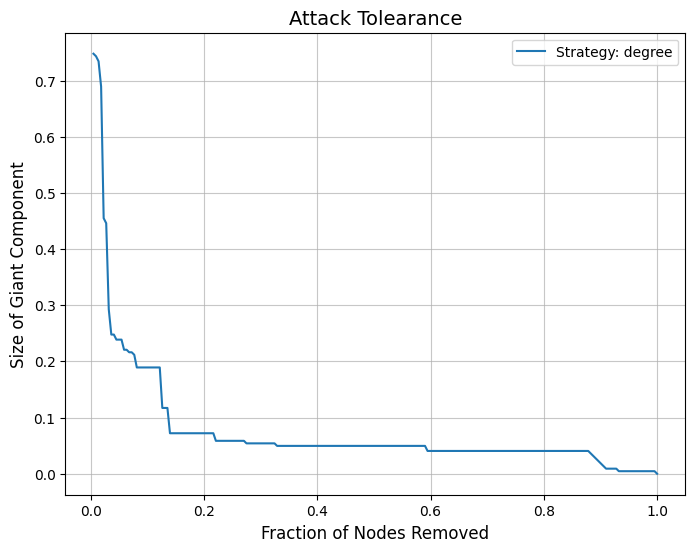

In [9]:
plot_giant_component_vs_node_removal(undirected_G, "degree", "Attack Tolearance")


# Community

In [9]:
import networkx as nx
import community as community_louvain
import matplotlib.pyplot as plt

def detect_communities(G):
    """
    Detects communities in an undirected graph using the Louvain algorithm.

    Parameters:
        G (networkx.Graph): The input graph.

    Returns:
        dict: A dictionary where keys are nodes and values are community IDs.
    """
    # Compute the best partition (community structure)
    partition = community_louvain.best_partition(G)
    
    return partition

def plot_large_communities(G, partition):
    """
    Plots large graphs with communities in a visually clear manner.

    Parameters:
        G (networkx.Graph): The input graph.
        partition (dict): A dictionary mapping nodes to community IDs.
    """
    # Assign colors to nodes based on their community
    node_colors = [partition[node] for node in G.nodes()]

    # Use a spring layout for better spacing
    pos = nx.spring_layout(G, seed=42)  # Adjust seed for consistent layout

    plt.figure(figsize=(12, 8))
    nx.draw(
        G,
        pos,
        node_color=node_colors,
        cmap=plt.cm.tab20,
        node_size=100,  # Adjust node size
        edge_color="gray",
        alpha=0.7,  # Transparency for edges
        with_labels=False  # Hide labels for clarity
    )
    plt.title("Communities in the Network (Simplified)", fontsize=16)
    plt.show()





Node-to-Community Mapping:
{'Dhaka': 0, 'Biman_Bandar': 0, 'BBSetu_E': 0, 'Chatmohar': 0, 'Natore': 0, 'Santahar': 2, 'Talora': 2, 'Bogura': 3, 'Sonatola': 3, 'Bonar_Para': 3, 'Gaibandha': 3, 'Bamondanga': 3, 'Pirgacha': 3, 'Kaunia': 3, 'Kurigram': 3, 'Rangpur': 3, 'Joypurhat': 2, 'Parbatipur': 8, 'Dinajpur': 8, 'Pirganj': 8, 'Thakurgaon_Road': 8, 'B Sirajul Islam': 8, 'Joydebpur': 0, 'Tangail': 0, 'SH M Monsur Ali': 0, 'Ullapara': 0, 'Ishwardi Bypass': 0, 'Akkelpur': 2, 'Panchbibi': 2, 'Birampur': 2, 'Fulbari': 2, 'Chirirbandar': 8, 'Setabganj': 8, 'Ruhia': 8, 'Kismat': 8, 'Khulna': 6, 'Noapara': 6, 'Jashore': 6, 'Mubarakganj': 6, 'Kotchandpur': 6, 'Darshana_Halt': 6, 'Chuadanga': 6, 'Alamdanga': 6, 'Poradaha': 6, 'Bheramara': 6, 'Pakshi': 6, 'Ishwardi': 0, 'Ahsanganj': 2, 'Saidpur': 8, 'Nilphamari': 8, 'Domar': 8, 'Chilahati': 8, 'Jamtail': 0, 'Boral_Bridge': 0, 'Abdulpur': 9, 'Arani': 9, 'Rajshahi': 9, 'Daulatpur': 6, 'Gobra': 10, 'Borashi': 10, 'Gopalganj': 10, 'Chandradighalia': 1

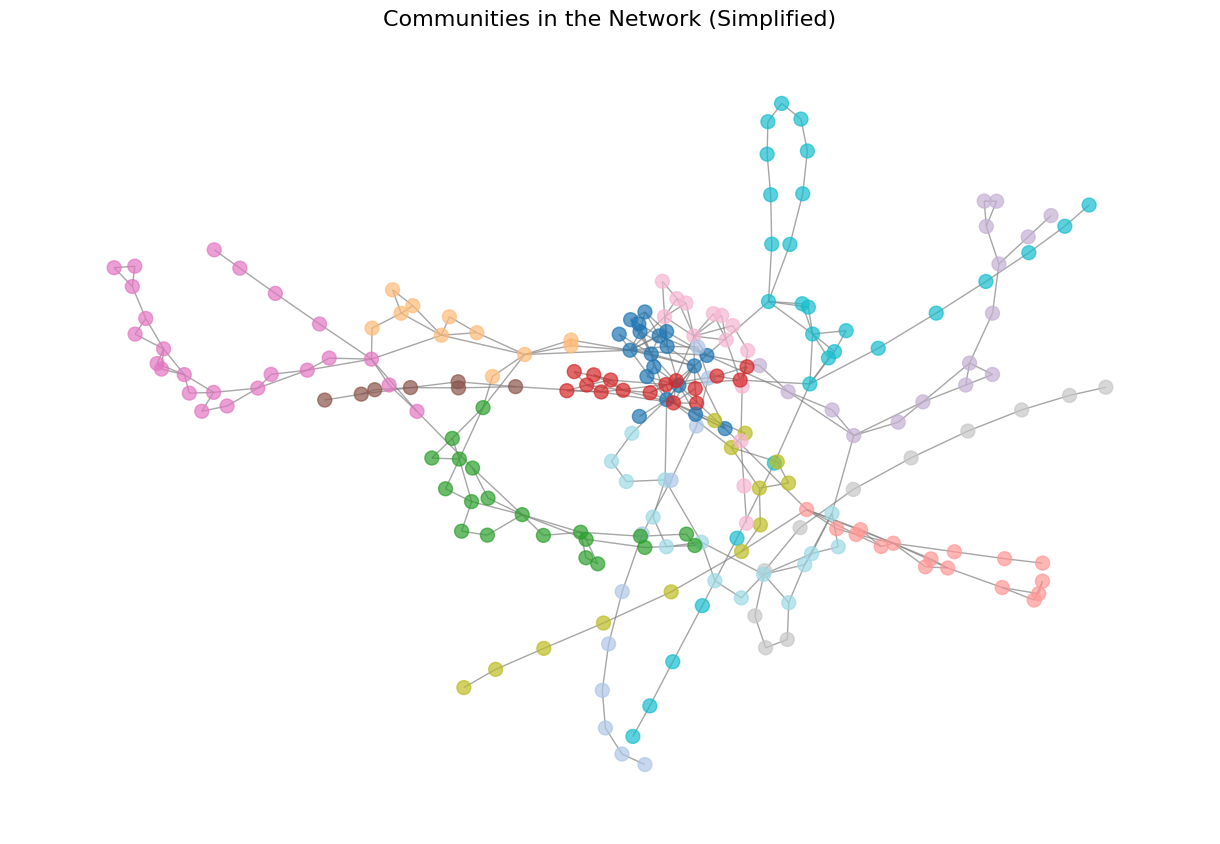

In [10]:
# Detect communities
communities = detect_communities(undirected_G)

# Print the communities (node-to-community mapping)
print("Node-to-Community Mapping:")
print(communities)

# Plot the graph with community coloring
plot_large_communities(undirected_G, communities)

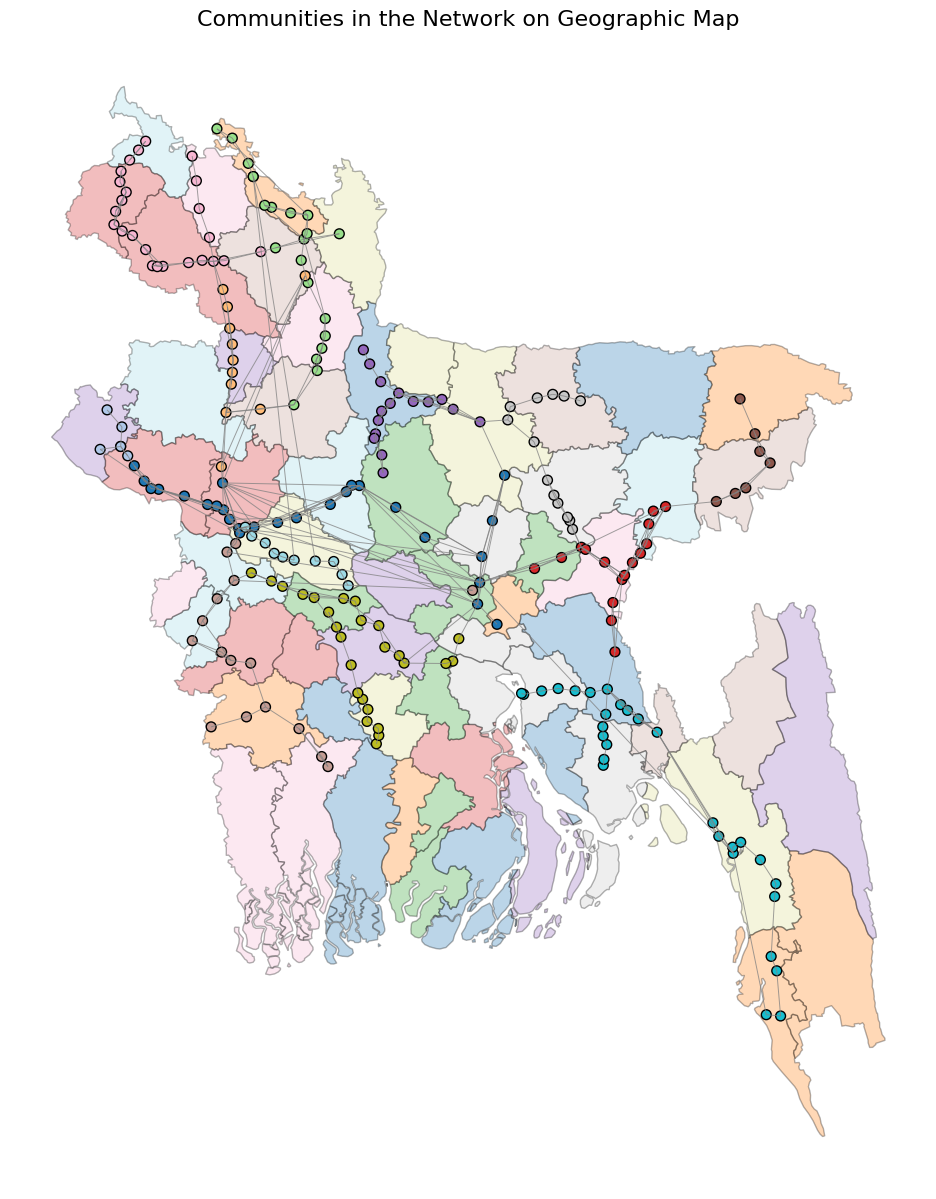

In [11]:
import networkx as nx
import community as community_louvain
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString
import geopandas as gpd

import random
import numpy as np

# Set random seed
random.seed(42)
np.random.seed(42)

def plot_communities_on_map(G, partition, base_map_gdf):
    """
    Plots communities on a geographic map using node coordinates.

    Parameters:
        G (networkx.Graph): The input graph.
        partition (dict): A dictionary mapping nodes to community IDs.
        base_map_gdf (GeoDataFrame): The geographic base map.
    """
    # Extract node coordinates and community info
    base_map_gdf['color'] = base_map_gdf.index % 10
    nodes = []
    for node, data in G.nodes(data=True):
        if 'latitude' in data and 'longitude' in data:
            try:
                lat = float(data['latitude'])
                lon = float(data['longitude'])
                community_id = partition[node]
                nodes.append({'id': node, 'geometry': Point(lon, lat), 'community': community_id})
            except ValueError:
                print(f"Invalid coordinates for node {node}, skipping.")

    # Create GeoDataFrame for nodes
    stations_gdf = gpd.GeoDataFrame(nodes)

    # Plot the base map
    fig, ax = plt.subplots(figsize=(15, 15))
    base_map_gdf.plot(column='color', cmap='tab20', legend=False, ax=ax, alpha=0.3, edgecolor='black')

    # Plot nodes (train stations) colored by community
    stations_gdf.plot(
        ax=ax,
        column='community',  # Color by community
        cmap='tab20',
        markersize=50,
        # legend=True,
        legend_kwds={'label': "Community"},
        edgecolor='black',
    )

    # Plot edges
    edges = []
    for u, v in G.edges():
        u_data = G.nodes[u]
        v_data = G.nodes[v]
        if 'latitude' in u_data and 'longitude' in u_data and 'latitude' in v_data and 'longitude' in v_data:
            try:
                line = LineString([
                    Point(float(u_data['longitude']), float(u_data['latitude'])),
                    Point(float(v_data['longitude']), float(v_data['latitude']))
                ])
                edges.append({'geometry': line})
            except ValueError:
                print(f"Invalid edge coordinates between {u} and {v}, skipping.")
    routes_gdf = gpd.GeoDataFrame(edges)
    routes_gdf.plot(ax=ax, color='gray', linewidth=0.7, alpha=0.75)

    # Finalize plot
    plt.title("Communities in the Network on Geographic Map", fontsize=16)
    plt.axis("off")
    plt.show()

partition = detect_communities(undirected_G)
base_map_gdf = gpd.read_file('map_overlay/small_bangladesh_geojson_adm2_64_districts_zillas.geojson')
plot_communities_on_map(undirected_G, partition, base_map_gdf)


# Cut nodes

In [20]:
def find_all_cut_nodes_of_size_1(G : nx.Graph):
    """
    Recursively finds all cut nodes of size 1 in a graph.

    Parameters:
        G (networkx.Graph): The input graph.

    Returns:
        cut_nodes (set): Set of all cut nodes of
    """
    cut_nodes = set()
    for node in G.nodes:
        G_copy = G.copy()
        G_copy.remove_node(node)
        if not nx.is_connected(G_copy):
            cut_nodes.add(node)
    return cut_nodes


In [21]:
size_1_cutnodes = find_all_cut_nodes_of_size_1(undirected_G)

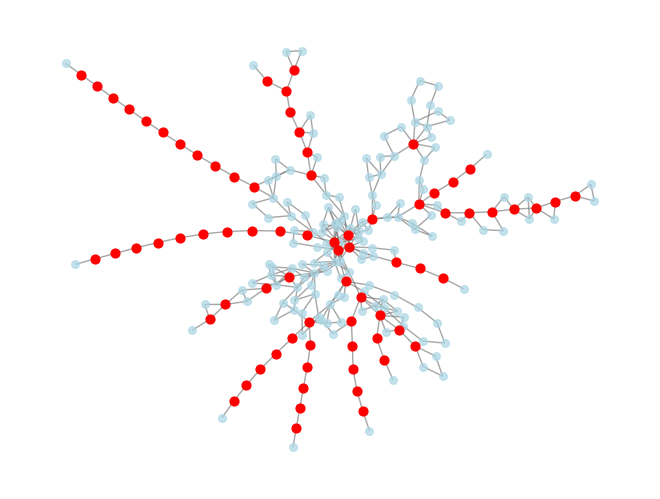

In [22]:
pos = nx.kamada_kawai_layout(undirected_G)
nx.draw(
    undirected_G,
    pos,
    with_labels=False,
    node_color="lightblue",
    node_size=30,
    edge_color="gray",
    alpha=0.7
)
nx.draw_networkx_nodes(
    undirected_G,
    pos,
    nodelist=size_1_cutnodes,
    node_color="red",
    node_size=40
)

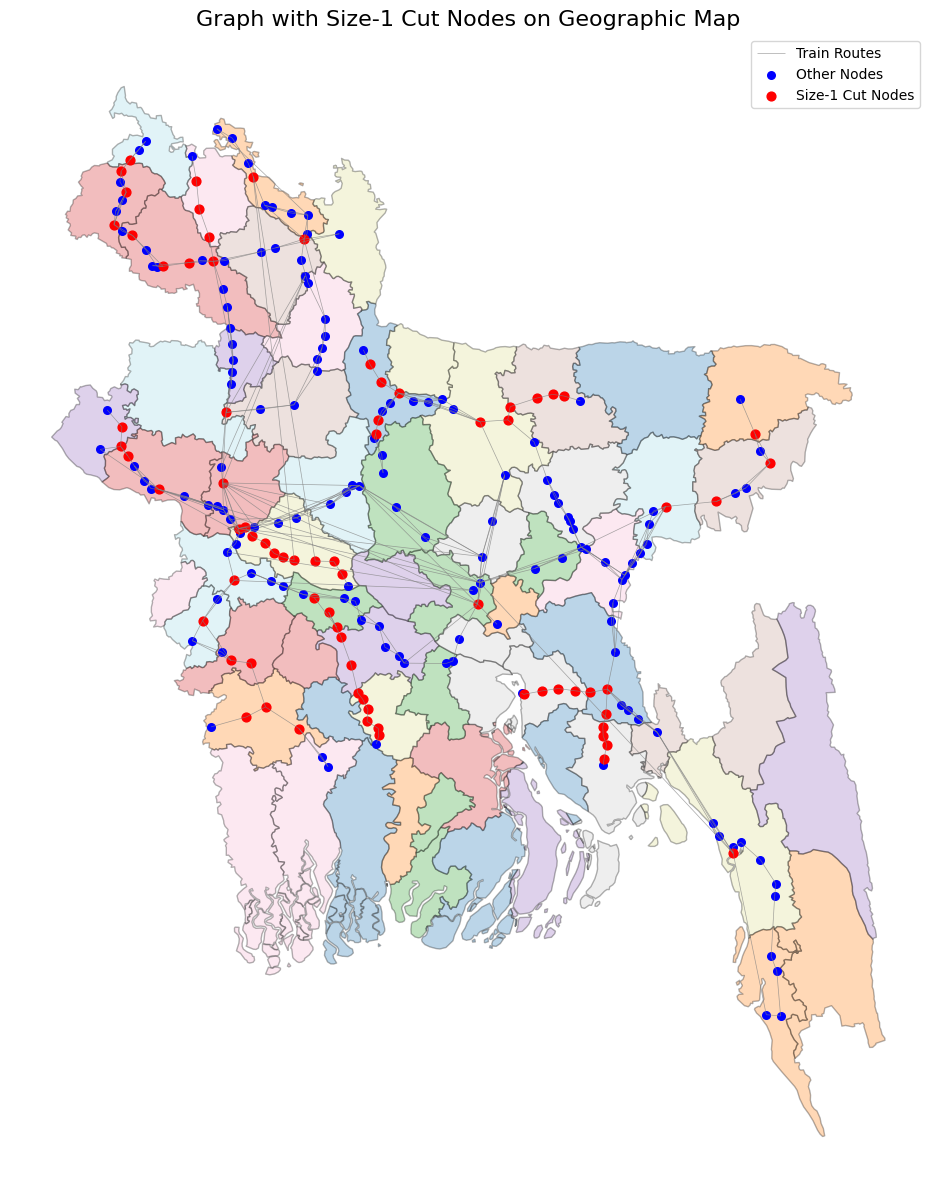

In [23]:
import networkx as nx
from shapely.geometry import Point, LineString
import geopandas as gpd
import matplotlib.pyplot as plt


def plot_graph_with_cut_nodes_on_map(G, size_1_cutnodes, base_map_path):
    """
    Plots the graph on a geographic map with size-1 cut nodes highlighted.

    Parameters:
        G (networkx.Graph): The input graph.
        size_1_cutnodes (list): List of size-1 cut nodes.
        base_map_path (str): Path to the base map GeoJSON file.
    """
    # Load base map
    base_map_gdf = gpd.read_file(base_map_path)
    base_map_gdf['color'] = base_map_gdf.index % 10  # Add color column inside the function

    # Create GeoDataFrame for nodes
    nodes = []
    for node, data in G.nodes(data=True):
        if 'latitude' in data and 'longitude' in data:
            lat = float(data['latitude'])
            lon = float(data['longitude'])
            is_cut = node in size_1_cutnodes
            nodes.append({'id': node, 'geometry': Point(lon, lat), 'is_cut': is_cut})

    nodes_gdf = gpd.GeoDataFrame(nodes)

    # Create GeoDataFrame for edges
    edges = []
    for u, v in G.edges():
        u_data = G.nodes[u]
        v_data = G.nodes[v]
        if 'latitude' in u_data and 'longitude' in u_data and 'latitude' in v_data and 'longitude' in v_data:
            line = LineString([
                Point(float(u_data['longitude']), float(u_data['latitude'])),
                Point(float(v_data['longitude']), float(v_data['latitude']))
            ])
            edges.append({'geometry': line})
    edges_gdf = gpd.GeoDataFrame(edges)

    # Plot the base map
    fig, ax = plt.subplots(figsize=(15, 15))
    base_map_gdf.plot(column='color', cmap='tab20', legend=False, ax=ax, alpha=0.3, edgecolor='black')

    # Plot edges
    edges_gdf.plot(ax=ax, color='gray', linewidth=0.5, alpha=0.7, label='Train Routes')

    # Plot nodes
    nodes_gdf[~nodes_gdf['is_cut']].plot(
        ax=ax, color='blue', markersize=30, label='Other Nodes'
    )
    nodes_gdf[nodes_gdf['is_cut']].plot(
        ax=ax, color='red', markersize=40, label='Size-1 Cut Nodes'
    )

    # Finalize plot
    plt.title("Graph with Size-1 Cut Nodes on Geographic Map", fontsize=16)
    plt.legend(loc='upper right')
    plt.axis("off")
    plt.show()

# Main script
if __name__ == "__main__":
    # Define the base map path
    base_map_path = 'map_overlay/small_bangladesh_geojson_adm2_64_districts_zillas.geojson'

    # Create the graph
    G = undirected_G

    # Find size-1 cut nodes
    size_1_cutnodes = find_all_cut_nodes_of_size_1(G)

    # Plot the graph with size-1 cut nodes on the map
    plot_graph_with_cut_nodes_on_map(G, size_1_cutnodes, base_map_path)


# Cut edges

Cut Edges (Bridges): [('Dhaka', 'Narayanganj'), ('Parbatipur', 'Saidpur'), ('Ishwardi Bypass', 'Majhgram'), ('Ruhia', 'Kismat'), ('Noapara', 'Jashore'), ('Jashore', 'Mubarakganj'), ('Jashore', 'Jhikargacha'), ('Mubarakganj', 'Kotchandpur'), ('Saidpur', 'Nilphamari'), ('Nilphamari', 'Domar'), ('Domar', 'Chilahati'), ('Gobra', 'Borashi'), ('Borashi', 'Gopalganj'), ('Gopalganj', 'Chandradighalia'), ('Chandradighalia', 'Choto Bahirbag'), ('Choto Bahirbag', 'Chapta'), ('Chapta', 'Kashiani'), ('Kashiani', 'Boalmari_Bazar'), ('Boalmari_Bazar', 'Madhukhali'), ('Madhukhali', 'Baharpur'), ('Baharpur', 'Naliagram'), ('Kalukhali', 'Naliagram'), ('Benapole', 'Jhikargacha'), ('Dhalarchar', 'Badherhat'), ('Badherhat', 'Kashinathpur'), ('Kashinathpur', 'Sathia_Rajapur'), ('Sathia_Rajapur', 'Tantibandha'), ('Tantibandha', 'Dublia'), ('Dublia', 'Raghabpur'), ('Raghabpur', 'Pabna'), ('Pabna', 'Tebunia'), ('Tebunia', 'Dashuria'), ('Dashuria', 'Majhgram'), ('Lolitnagar', 'Amnura'), ('Laksam', 'Natherpetua'

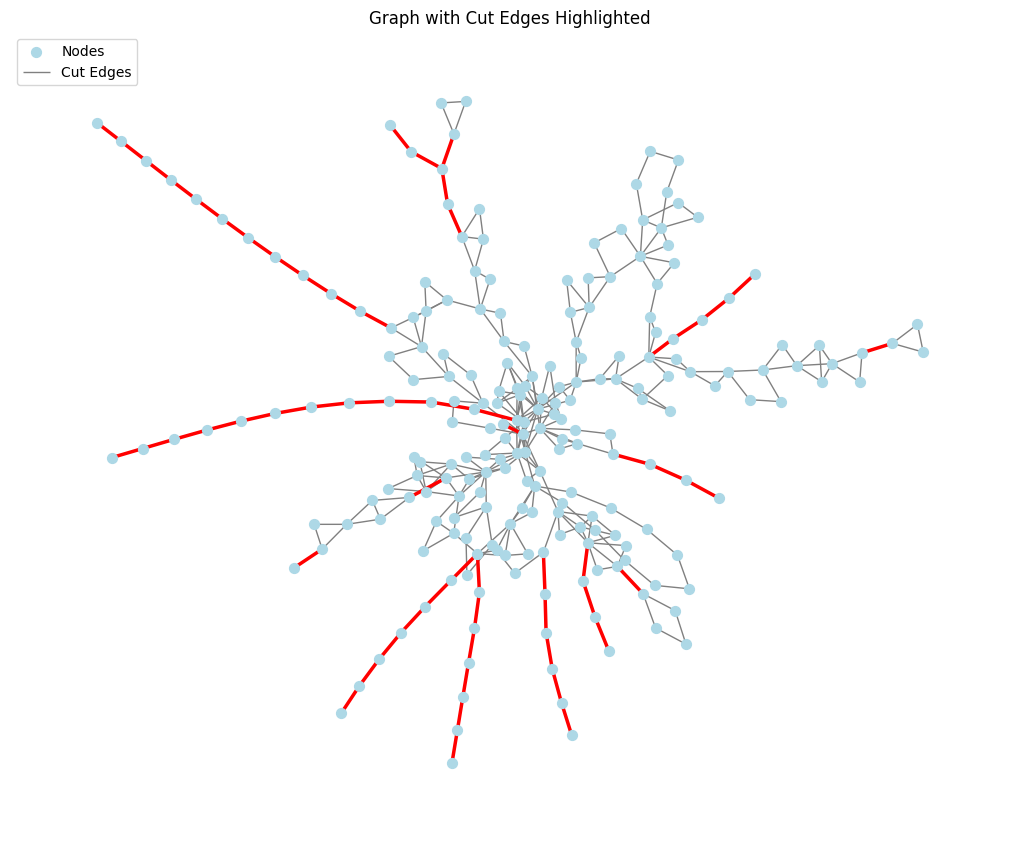

In [24]:
import networkx as nx
import matplotlib.pyplot as plt

def find_cut_edges(G):
    """
    Finds all cut edges (bridges) in the graph.

    Parameters:
        G (networkx.Graph): The input graph.

    Returns:
        list: List of tuples representing the cut edges.
    """
    return list(nx.bridges(G))

def plot_graph_with_cut_edges(G, cut_edges):
    """
    Plots the graph, highlighting the cut edges in red.

    Parameters:
        G (networkx.Graph): The input graph.
        cut_edges (list): List of cut edges.
    """
    pos = nx.kamada_kawai_layout(G)  # Generate layout positions for nodes

    # Draw the graph with default edge colors
    plt.figure(figsize=(10, 8))
    nx.draw(
        G,
        pos,
        with_labels=False,
        node_size=50,
        edge_color="gray",
        node_color="lightblue"
    )

    # Highlight cut edges in red
    nx.draw_networkx_edges(
        G,
        pos,
        edgelist=cut_edges,
        edge_color="red",
        width=2.5,
        label="Cut Edges"
    )

    plt.title("Graph with Cut Edges Highlighted")
    plt.legend(["Nodes", "Cut Edges"], loc="upper left")
    plt.show()

# Main script
if __name__ == "__main__":
    # Create an example graph
    G = undirected_G

    # Ensure the graph is connected
    if nx.is_connected(G):
        # Find the cut edges
        cut_edges = find_cut_edges(G)
        print(f"Cut Edges (Bridges): {cut_edges}")

        # Plot the graph with cut edges highlighted
        plot_graph_with_cut_edges(G, cut_edges)
    else:
        print("The graph is not connected. No cut edges exist.")


Cut Edges (Bridges): [('Dhaka', 'Narayanganj'), ('Parbatipur', 'Saidpur'), ('Ishwardi Bypass', 'Majhgram'), ('Ruhia', 'Kismat'), ('Noapara', 'Jashore'), ('Jashore', 'Mubarakganj'), ('Jashore', 'Jhikargacha'), ('Mubarakganj', 'Kotchandpur'), ('Saidpur', 'Nilphamari'), ('Nilphamari', 'Domar'), ('Domar', 'Chilahati'), ('Gobra', 'Borashi'), ('Borashi', 'Gopalganj'), ('Gopalganj', 'Chandradighalia'), ('Chandradighalia', 'Choto Bahirbag'), ('Choto Bahirbag', 'Chapta'), ('Chapta', 'Kashiani'), ('Kashiani', 'Boalmari_Bazar'), ('Boalmari_Bazar', 'Madhukhali'), ('Madhukhali', 'Baharpur'), ('Baharpur', 'Naliagram'), ('Kalukhali', 'Naliagram'), ('Benapole', 'Jhikargacha'), ('Dhalarchar', 'Badherhat'), ('Badherhat', 'Kashinathpur'), ('Kashinathpur', 'Sathia_Rajapur'), ('Sathia_Rajapur', 'Tantibandha'), ('Tantibandha', 'Dublia'), ('Dublia', 'Raghabpur'), ('Raghabpur', 'Pabna'), ('Pabna', 'Tebunia'), ('Tebunia', 'Dashuria'), ('Dashuria', 'Majhgram'), ('Lolitnagar', 'Amnura'), ('Laksam', 'Natherpetua'

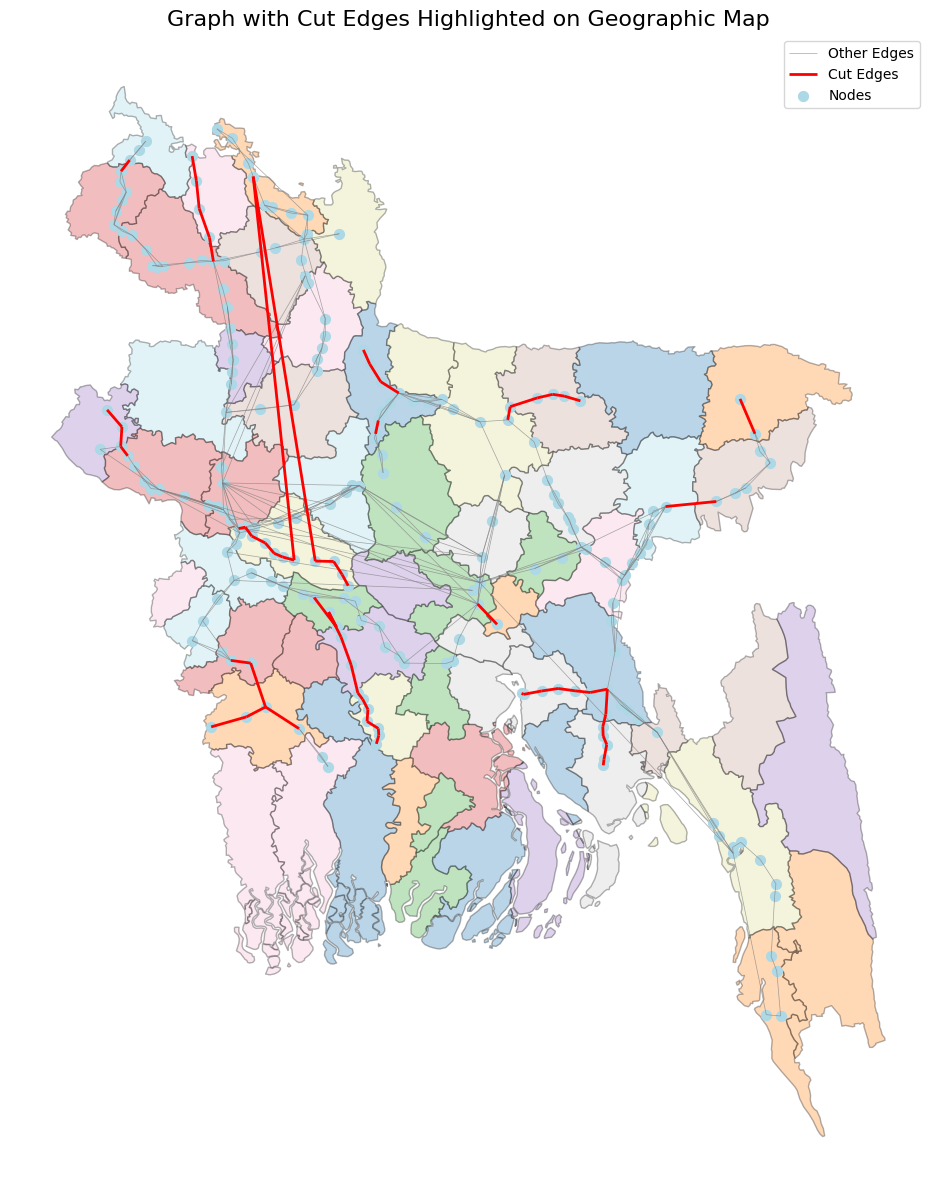

In [25]:
import networkx as nx
from shapely.geometry import Point, LineString
import geopandas as gpd
import matplotlib.pyplot as plt


def plot_graph_with_cut_edges_on_map(G, cut_edges, base_map_path):
    """
    Plots the graph on a geographic map, highlighting the cut edges in red.

    Parameters:
        G (networkx.Graph): The input graph.
        cut_edges (list): List of cut edges.
        base_map_path (str): Path to the base map GeoJSON file.
    """
    # Load base map
    base_map_gdf = gpd.read_file(base_map_path)
    base_map_gdf['color'] = base_map_gdf.index % 10  # Add color column inside the function

    # Create GeoDataFrame for nodes
    nodes = []
    for node, data in G.nodes(data=True):
        if 'latitude' in data and 'longitude' in data:
            lat = float(data['latitude'])
            lon = float(data['longitude'])
            nodes.append({'id': node, 'geometry': Point(lon, lat)})

    nodes_gdf = gpd.GeoDataFrame(nodes)

    # Create GeoDataFrame for edges
    edges = []
    for u, v in G.edges():
        u_data = G.nodes[u]
        v_data = G.nodes[v]
        if 'latitude' in u_data and 'longitude' in u_data and 'latitude' in v_data and 'longitude' in v_data:
            line = LineString([
                Point(float(u_data['longitude']), float(u_data['latitude'])),
                Point(float(v_data['longitude']), float(v_data['latitude']))
            ])
            is_cut = (u, v) in cut_edges or (v, u) in cut_edges
            edges.append({'geometry': line, 'is_cut': is_cut})

    edges_gdf = gpd.GeoDataFrame(edges)

    # Plot the base map
    fig, ax = plt.subplots(figsize=(15, 15))
    base_map_gdf.plot(column='color', cmap='tab20', legend=False, ax=ax, alpha=0.3, edgecolor='black')

    # Plot edges
    edges_gdf[~edges_gdf['is_cut']].plot(
        ax=ax, color='gray', linewidth=0.5, alpha=0.7, label='Other Edges'
    )
    edges_gdf[edges_gdf['is_cut']].plot(
        ax=ax, color='red', linewidth=2, label='Cut Edges'
    )

    # Plot nodes
    nodes_gdf.plot(
        ax=ax, color='lightblue', markersize=50, label='Nodes'
    )

    # Finalize plot
    plt.title("Graph with Cut Edges Highlighted on Geographic Map", fontsize=16)
    plt.legend(loc='upper right')
    plt.axis("off")
    plt.show()

# Main script
if __name__ == "__main__":
    # Define the base map path
    base_map_path = 'map_overlay/small_bangladesh_geojson_adm2_64_districts_zillas.geojson'

    # Create the graph
    G = undirected_G

    # Ensure the graph is connected
    if nx.is_connected(G):
        # Find the cut edges
        cut_edges = find_cut_edges(G)
        print(f"Cut Edges (Bridges): {cut_edges}")

        # Plot the graph with cut edges highlighted on the map
        plot_graph_with_cut_edges_on_map(G, cut_edges, base_map_path)
    else:
        print("The graph is not connected. No cut edges exist.")


# Degree Correln

In [26]:
import networkx as nx
import numpy as np

def calculate_degree_correlation(G):
    """
    Calculate the degree correlation coefficients for the network.

    Parameters:
        G (networkx.Graph): The input graph.

    Returns:
        dict: Contains Pearson degree correlation coefficient and correlation exponent.
    """
    # Calculate Pearson degree correlation coefficient
    pearson_coefficient = nx.degree_pearson_correlation_coefficient(G)
    return {
        "pearson_coefficient": pearson_coefficient,
    }

# Example usage
if __name__ == "__main__":
    # Create an example graph
    G = undirected_G

    # Calculate degree correlation coefficients
    results = calculate_degree_correlation(G)

    # Print results
    print(f"Pearson Degree Correlation Coefficient: {results['pearson_coefficient']}")


Pearson Degree Correlation Coefficient: 0.3072529949276795


Node degrees: {'Dhaka': 9, 'Biman_Bandar': 11, 'BBSetu_E': 10, 'Chatmohar': 6, 'Natore': 13, 'Santahar': 7, 'Talora': 2, 'Bogura': 4, 'Sonatola': 3, 'Bonar_Para': 5, 'Gaibandha': 4, 'Bamondanga': 2, 'Pirgacha': 2, 'Kaunia': 7, 'Kurigram': 2, 'Rangpur': 3, 'Joypurhat': 6, 'Parbatipur': 7, 'Dinajpur': 4, 'Pirganj': 5, 'Thakurgaon_Road': 5, 'B Sirajul Islam': 2, 'Joydebpur': 8, 'Tangail': 3, 'SH M Monsur Ali': 4, 'Ullapara': 6, 'Ishwardi Bypass': 8, 'Akkelpur': 3, 'Panchbibi': 3, 'Birampur': 4, 'Fulbari': 2, 'Chirirbandar': 4, 'Setabganj': 4, 'Ruhia': 3, 'Kismat': 3, 'Khulna': 2, 'Noapara': 3, 'Jashore': 3, 'Mubarakganj': 2, 'Kotchandpur': 4, 'Darshana_Halt': 3, 'Chuadanga': 4, 'Alamdanga': 2, 'Poradaha': 5, 'Bheramara': 4, 'Pakshi': 2, 'Ishwardi': 6, 'Ahsanganj': 3, 'Saidpur': 2, 'Nilphamari': 2, 'Domar': 2, 'Chilahati': 1, 'Jamtail': 4, 'Boral_Bridge': 4, 'Abdulpur': 7, 'Arani': 4, 'Rajshahi': 10, 'Daulatpur': 2, 'Gobra': 1, 'Borashi': 2, 'Gopalganj': 2, 'Chandradighalia': 2, 'Choto Bah

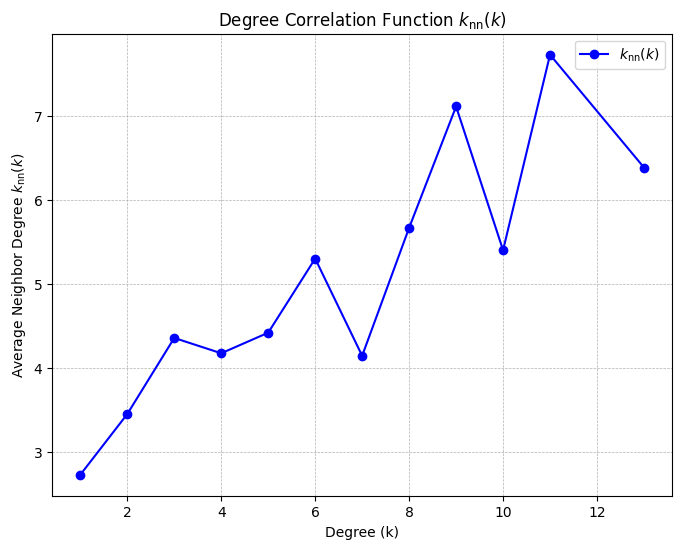

In [27]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

def calculate_knn_with_debug(G):
    """
    Calculate k_nn(k), the average degree of neighbors of nodes with degree k, with debugging output.

    Parameters:
        G (networkx.Graph): The input graph.

    Returns:
        knn (dict): A dictionary where keys are degrees (k) and values are k_nn(k).
    """
    # Get the degree of each node
    degrees = dict(G.degree())
    
    # Debugging: Print node degrees
    print("Node degrees:", degrees)
    
    # Dictionaries to store sums and counts
    degree_sum = defaultdict(int)  # Sum of neighbor degrees for nodes of degree k
    degree_count = defaultdict(int)  # Number of nodes with degree k
    
    # Iterate over all nodes
    for node in G.nodes():
        node_degree = degrees[node]  # Degree of the current node
        neighbors = list(G.neighbors(node))
        neighbor_degrees = [degrees[neighbor] for neighbor in neighbors]
        
        # Debugging: Print node and its neighbors' degrees
        print(f"Node {node} (degree {node_degree}) -> Neighbor degrees: {neighbor_degrees}")
        
        # Update sums and counts for the current node degree
        degree_sum[node_degree] += sum(neighbor_degrees)
        degree_count[node_degree] += len(neighbors)
    
    # Calculate k_nn(k)
    knn = {}
    for k in degree_sum:
        if degree_count[k] > 0:
            knn[k] = degree_sum[k] / degree_count[k]
        else:
            knn[k] = 0
    
    # Debugging: Print intermediate results
    print("Degree sum:", dict(degree_sum))
    print("Degree count:", dict(degree_count))
    print("k_nn(k):", knn)
    
    return knn

def plot_knn(knn):
    """
    Plot k_nn(k) vs. k.

    Parameters:
        knn (dict): A dictionary where keys are degrees (k) and values are k_nn(k).
    """
    # Extract k and k_nn(k)
    k_values = sorted(knn.keys())
    knn_values = [knn[k] for k in k_values]

    # Plot the function
    plt.figure(figsize=(8, 6))
    plt.plot(k_values, knn_values, marker="o", linestyle="-", color="blue", label=r"$k_{\text{nn}}(k)$")
    # plt.xscale("log")
    # plt.yscale("log")
    plt.xlabel("Degree (k)")
    plt.ylabel(r"Average Neighbor Degree $k_{\text{nn}}(k)$")
    plt.title(r"Degree Correlation Function $k_{\text{nn}}(k)$")
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.legend()
    plt.show()

# Example usage
if __name__ == "__main__":
    # Create an example undirected graph
    G = undirected_G  # Scale-free network

    # Calculate k_nn(k)
    knn = calculate_knn_with_debug(G)

    # Plot the results
    plot_knn(knn)


In [28]:
import networkx as nx
import random
import matplotlib.pyplot as plt

def degree_preserving_randomization(G, num_swaps):
    """
    Perform degree-preserving randomization of an undirected graph, ensuring it remains simple
    and no edge is used more than once during a single swap.

    Parameters:
        G (networkx.Graph): The input graph.
        num_swaps (int): The number of edge swaps to perform.

    Returns:
        G_randomized (networkx.Graph): A new graph with randomized edges.
    """
    # Make a copy of the input graph to avoid modifying the original
    G_randomized = G.copy()
    swaps = 0
    attempts = 0
    max_attempts = num_swaps * 10  # To avoid infinite loops if swaps are not feasible

    while swaps < num_swaps and attempts < max_attempts:
        attempts += 1

        # Dynamically retrieve the edge list to ensure consistency
        edges = list(G_randomized.edges())
        
        # Randomly select two distinct edges (a, b) and (c, d)
        edge1, edge2 = random.sample(edges, 2)
        a, b = edge1
        c, d = edge2

        # Skip if the swap creates self-loops or duplicate edges
        if len({a, b, c, d}) < 4:  # Self-loop check
            continue
        if (a, d) in edges or (c, b) in edges:  # Duplicate edge check
            continue

        # Perform the edge swap
        G_randomized.remove_edge(a, b)
        G_randomized.remove_edge(c, d)
        G_randomized.add_edge(a, d)
        G_randomized.add_edge(c, b)

        swaps += 1

    if attempts >= max_attempts:
        print(f"Stopped after {attempts} attempts with {swaps} successful swaps.")
    else:
        print(f"Completed {swaps} swaps successfully.")

    return G_randomized

In [29]:
randomized_undir_G = degree_preserving_randomization(undirected_G, 10000)

Completed 10000 swaps successfully.


Node degrees: {'Dhaka': 9, 'Biman_Bandar': 11, 'BBSetu_E': 10, 'Chatmohar': 6, 'Natore': 11, 'Santahar': 7, 'Talora': 2, 'Bogura': 4, 'Sonatola': 3, 'Bonar_Para': 4, 'Gaibandha': 4, 'Bamondanga': 2, 'Pirgacha': 2, 'Kaunia': 7, 'Kurigram': 2, 'Rangpur': 3, 'Joypurhat': 6, 'Parbatipur': 6, 'Dinajpur': 4, 'Pirganj': 5, 'Thakurgaon_Road': 5, 'B Sirajul Islam': 2, 'Joydebpur': 8, 'Tangail': 3, 'SH M Monsur Ali': 4, 'Ullapara': 6, 'Ishwardi Bypass': 8, 'Akkelpur': 3, 'Panchbibi': 3, 'Birampur': 4, 'Fulbari': 2, 'Chirirbandar': 4, 'Setabganj': 4, 'Ruhia': 3, 'Kismat': 3, 'Khulna': 2, 'Noapara': 3, 'Jashore': 3, 'Mubarakganj': 2, 'Kotchandpur': 4, 'Darshana_Halt': 3, 'Chuadanga': 4, 'Alamdanga': 2, 'Poradaha': 5, 'Bheramara': 4, 'Pakshi': 2, 'Ishwardi': 6, 'Ahsanganj': 3, 'Saidpur': 2, 'Nilphamari': 2, 'Domar': 2, 'Chilahati': 1, 'Jamtail': 4, 'Boral_Bridge': 3, 'Abdulpur': 6, 'Arani': 4, 'Rajshahi': 9, 'Daulatpur': 2, 'Gobra': 1, 'Borashi': 2, 'Gopalganj': 2, 'Chandradighalia': 2, 'Choto Bahi

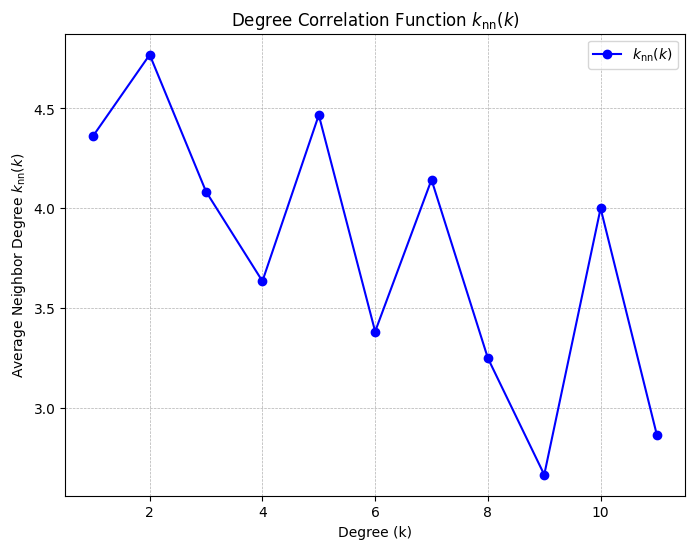

In [30]:
knn_randomized = calculate_knn_with_debug(randomized_undir_G)
plot_knn(knn_randomized)

In [31]:
# pearson correlation coefficient for the randomized graph
results_randomized = calculate_degree_correlation(randomized_undir_G)
print(f"Pearson Degree Correlation Coefficient (Randomized): {results_randomized['pearson_coefficient']}")

Pearson Degree Correlation Coefficient (Randomized): -0.18916350474114135


# Cut node Ranking

In [37]:
# check removal of which node will create maximum number of connected components
def find_max_connected_components_node(G):
    """
    Finds the node whose removal creates the maximum number of connected components.

    Parameters:
        G (networkx.Graph): The input graph.

    Returns:
        node (int): The node ID that creates the maximum connected components.
        num_components (int): The number of connected components.
    """
    max_components = 0
    max_node = None

    for node in G.nodes():
        G_copy = G.copy()
        G_copy.remove_node(node)
        num_components = nx.number_connected_components(G_copy)

        if num_components > max_components:
            max_components = num_components
            max_node = node
        elif num_components == max_components:
            # Break ties by selecting the node with the highest degree
            if G.degree(node) > G.degree(max_node):
                max_node = node
            

    return max_node, max_components

In [38]:
max_node, max_components = find_max_connected_components_node(undirected_G)

In [39]:
max_components

3

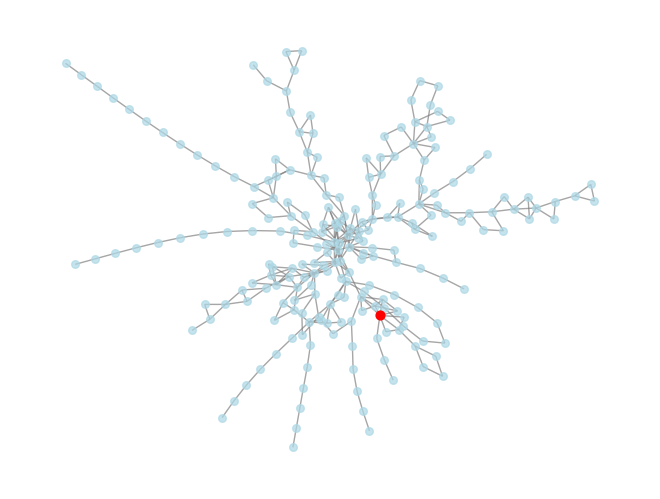

In [40]:
pos = nx.kamada_kawai_layout(undirected_G)
nx.draw(
    undirected_G,
    pos,
    with_labels=False,
    node_color="lightblue",
    node_size=30,
    edge_color="gray",
    alpha=0.7
)
nx.draw_networkx_nodes(
    undirected_G,
    pos,
    nodelist=[max_node],
    node_color="red",
    node_size=40
)

In [41]:
# find betweenness centrality of the nodes
def calculate_betweenness_centrality(G):
    """
    Calculate the betweenness centrality for each node in the graph.

    Parameters:
        G (networkx.Graph): The input graph.

    Returns:
        dict: A dictionary where keys are nodes and values are betweenness centrality scores.
    """
    return nx.betweenness_centrality(G)


In [49]:
# find the cut node inside the size_1_cutnodes with the highest betweenness centrality
def find_max_betweenness_cut_node(G):
    """
    Finds the cut node with the highest betweenness centrality.

    Parameters:
        G (networkx.Graph): The input graph.
        cut_nodes (set): Set of cut nodes.
        centrality_scores (dict): Dictionary of betweenness centrality scores.

    Returns:
        node (int): The cut node with the highest betweenness centrality.
    """
    max_centrality = 0
    max_node = None
    centrality_scores = calculate_betweenness_centrality(G)
    cut_nodes = find_all_cut_nodes_of_size_1(G)
    for node in cut_nodes:
        if centrality_scores[node] > max_centrality:
            max_centrality = centrality_scores[node]
            max_node = node
        elif centrality_scores[node] == max_centrality:
            # Break ties by selecting the node with the highest degree
            if G.degree(node) > G.degree(max_node):
                max_node = node
                
    return max_node

In [50]:
node = find_max_betweenness_cut_node(undirected_G)

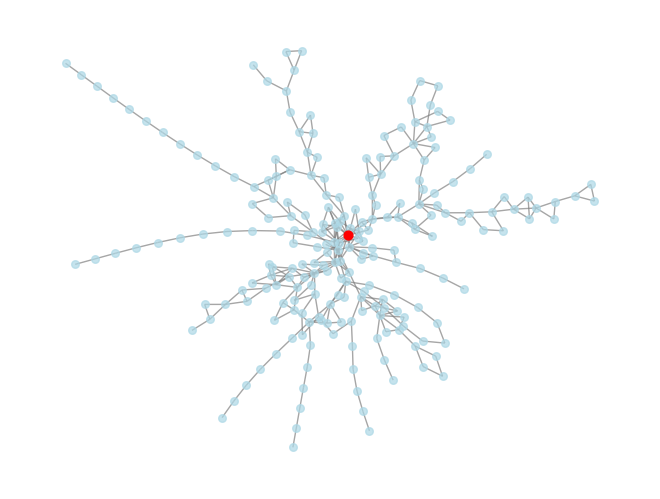

In [51]:
pos = nx.kamada_kawai_layout(undirected_G)
nx.draw(
    undirected_G,
    pos,
    with_labels=False,
    node_color="lightblue",
    node_size=30,
    edge_color="gray",
    alpha=0.7
)
nx.draw_networkx_nodes(
    undirected_G,
    pos,
    nodelist=[node],
    node_color="red",
    node_size=40
)

In [52]:
node

'Natore'

In [53]:
# rank the cut nodes based on their betweenness centrality
def rank_cut_nodes_by_betweenness_centrality(G):
    """
    Ranks the cut nodes by their betweenness centrality scores.

    Parameters:
        G (networkx.Graph): The input graph.

    Returns:
        list: A list of cut nodes sorted by betweenness centrality in descending order.
    """
    centrality_scores = calculate_betweenness_centrality(G)
    cut_nodes = find_all_cut_nodes_of_size_1(G)
    return sorted(cut_nodes, key=lambda x: centrality_scores[x], reverse=True)

In [54]:
rank_cut_nodes_by_betweenness_centrality(undirected_G)

['Natore',
 'Santahar',
 'Dhaka',
 'Chattogram',
 'Parbatipur',
 'Mymensingh',
 'Rajshahi',
 'Chirirbandar',
 'Poradaha',
 'Dinajpur',
 'Laksam',
 'Ishwardi Bypass',
 'Kalukhali',
 'Setabganj',
 'Jamalpur_Town',
 'Kaunia',
 'Naliagram',
 'Chuadanga',
 'Majhgram',
 'Shaistaganj',
 'Baharpur',
 'Dashuria',
 'Madhukhali',
 'Pirganj',
 'Tebunia',
 'Kotchandpur',
 'Pabna',
 'Boalmari_Bazar',
 'Kashiani',
 'Mubarakganj',
 'Sreemangal',
 'Raghabpur',
 'Gouripur_Myn',
 'Jashore',
 'Thakurgaon_Road',
 'Chapta',
 'Chitoshi_Road',
 'Dublia',
 'Natherpetua',
 'Sarishabari',
 'Tantibandha',
 'Choto Bahirbag',
 'Meher',
 'Shyamgonj',
 'Sonaimuri',
 'Lolitnagar',
 'Tarakandi',
 'Bajra',
 'Kulaura',
 'Saidpur',
 'Netrakona',
 'Sathia_Rajapur',
 'Ruhia',
 'Hajiganj',
 'Chandradighalia',
 'Kismat',
 'Thakrokona',
 'Amnura',
 'Choumuhani',
 'Nilphamari',
 'Noapara',
 'Gopalganj',
 'Kashinathpur',
 'Modhu_Road',
 'Melandah_Bazar',
 'Barhatta',
 'Nachole',
 'Badherhat',
 'Jhikargacha',
 'Maijdi Court',
 'M

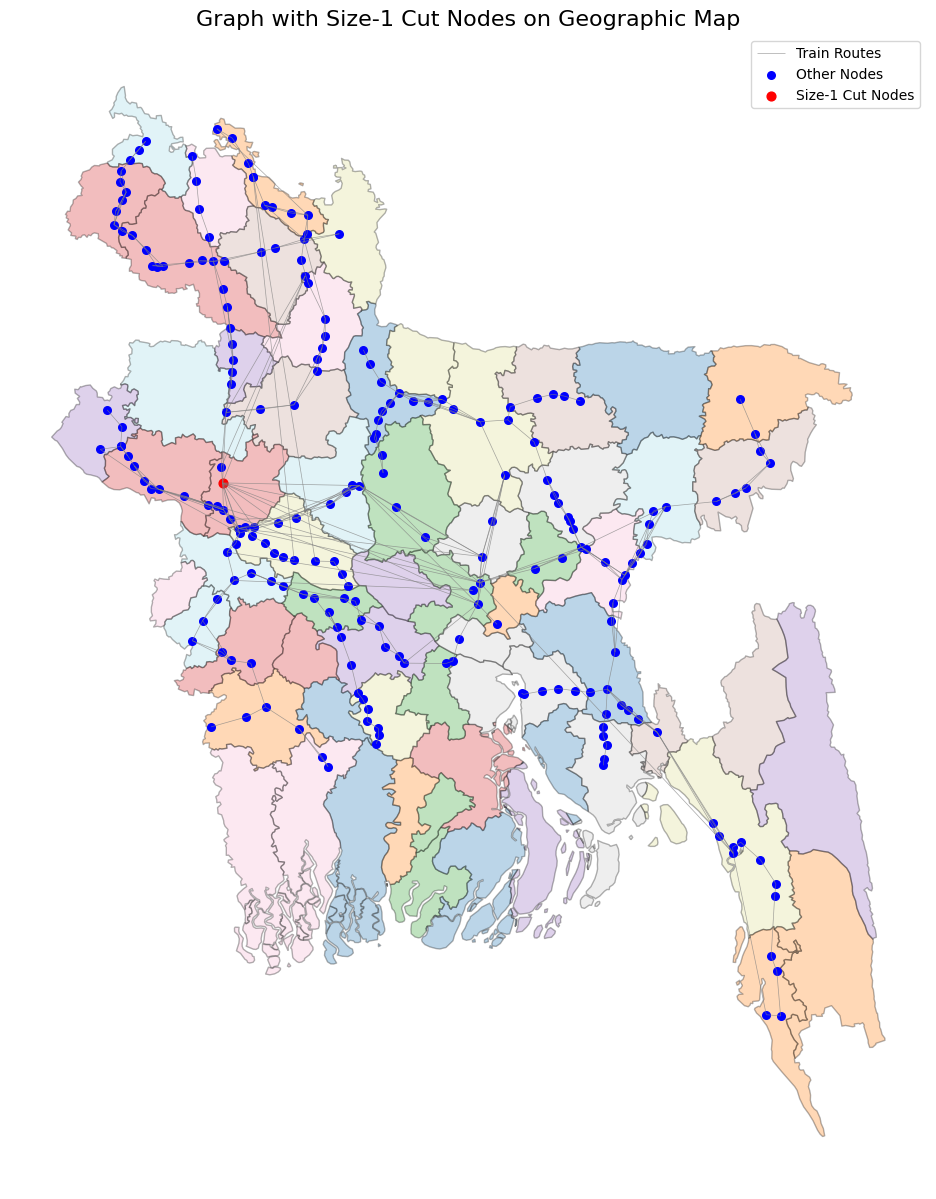

In [56]:
plot_graph_with_cut_nodes_on_map(undirected_G, [node], base_map_path)

# Cut edge ranking

In [62]:
# rank the cut edges based on their edge betweenness centrality
def rank_cut_edges_by_betweenness_centrality(G):
    """
    Ranks the cut edges by their edge betweenness centrality scores.

    Parameters:
        G (networkx.Graph): The input graph.

    Returns:
        list: A list of cut edges sorted by edge betweenness centrality in descending order.
    """
    edge_betweenness = nx.edge_betweenness_centrality(G)
    cut_edges = find_cut_edges(G)
    return sorted(cut_edges, key=lambda x: edge_betweenness[x], reverse=True)


In [65]:
sorted_cut_edges = rank_cut_edges_by_betweenness_centrality(undirected_G)


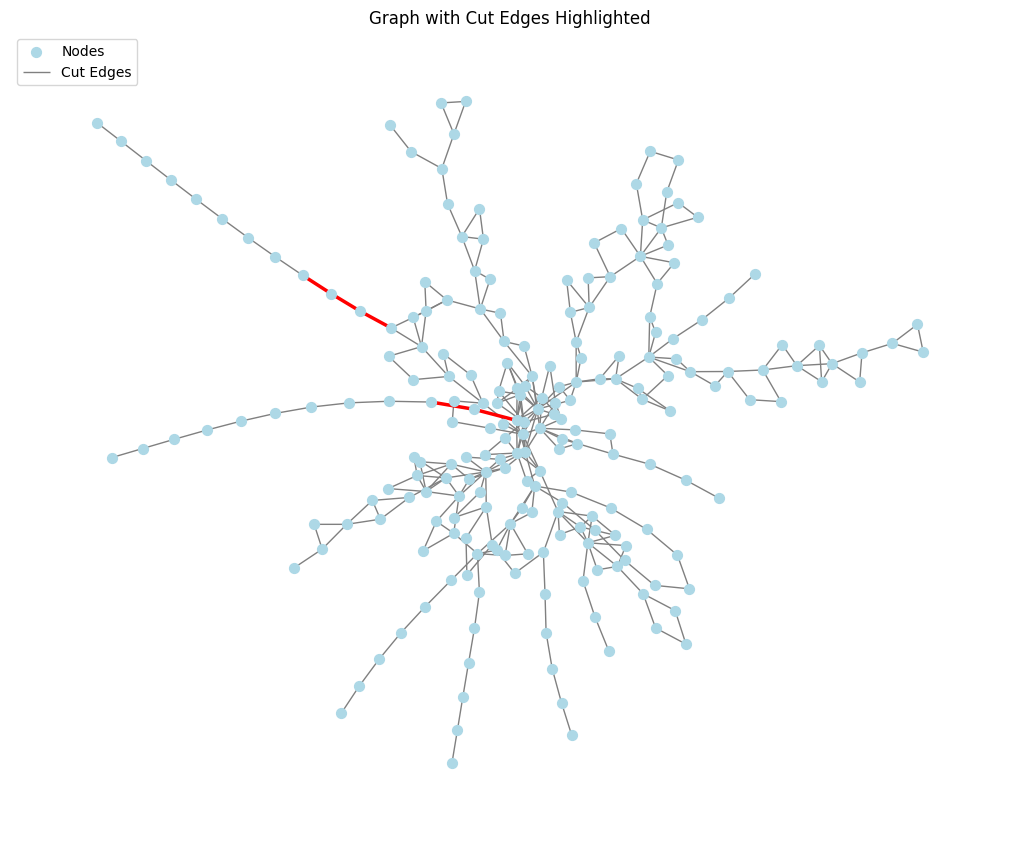

In [67]:
plot_graph_with_cut_edges(G, sorted_cut_edges[0:5])

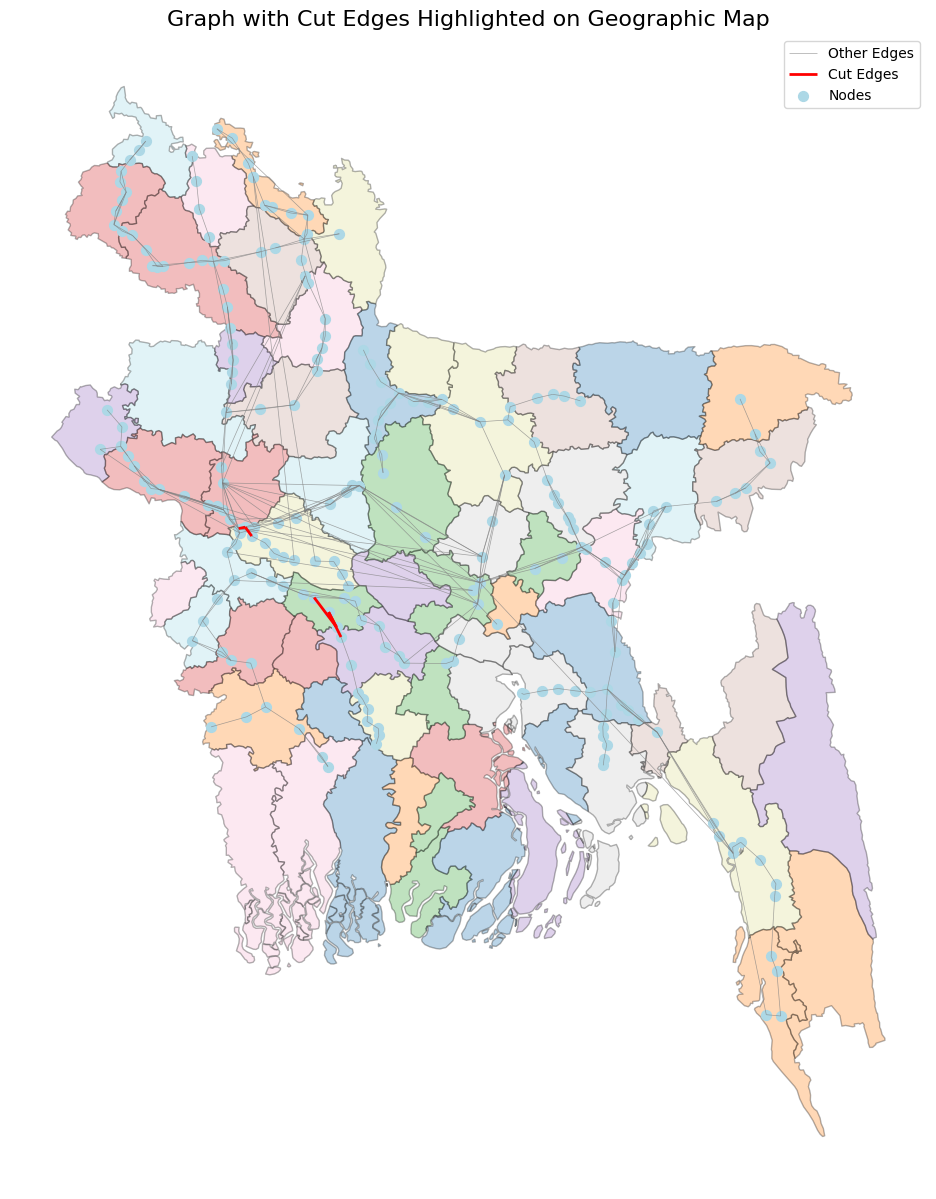

In [68]:
plot_graph_with_cut_edges_on_map(undirected_G, sorted_cut_edges[0:5], base_map_path)